# Detecting Populated Chessboards

**WIP : This currently isn't complete, look at GradientAngleBasedChessboardDetection instead**

We want to be able to take a photo of a chessboard in use, pieces and all, in an uncontrolled environment and find the chessboard corners and tiles.

There exists checkerboard detection algorithms, but they assume no occlusions, consistent black/white pattern, and clean demarcation with the background. We may be dealing with textured/patterned surfaces, heavy occlusion due to pieces or people's hands, etc., and the background may interrupt to the edges of the chessboard.

Populating the interactive namespace from numpy and matplotlib
Resizing from 4032x3024 to 600x450


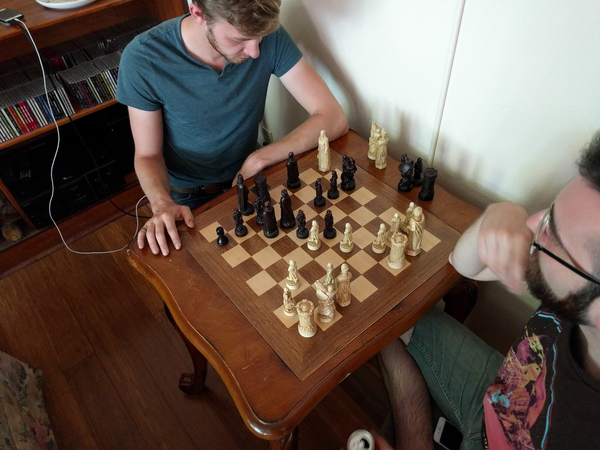

In [1]:
%pylab inline
from IPython.display import Image, display
import cv2
import PIL.Image
from io import BytesIO

def showarray(a, fmt='png'):
    """Expects 0-255 pixel values"""
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))


filename = "4.jpg"
img = PIL.Image.open(filename)
if max(img.size) > 600:
    width = img.size[0]
    height = img.size[1]
    if width > height:
        new_width  = 600
        new_height = int(new_width * height / width)
    else:
        new_height = 600
        new_width  = int(new_height * width / height)
    print("Resizing from %dx%d to %dx%d" % (width, height, new_width, new_height))
    img = img.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    
#display(Image(filename=filename))
display(img)

# Closing
Dilation + Erosion

In [2]:
K = 10
gry = np.asarray(img.convert("L"), dtype=np.float32)
blurred = cv2.bilateralFilter(gry,15,75,75)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(K,K))
# closing = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)


# showarray(blurred)
# showarray(closing)

# # normalize lighting
# a = gry/closing

# showarray(a*255)

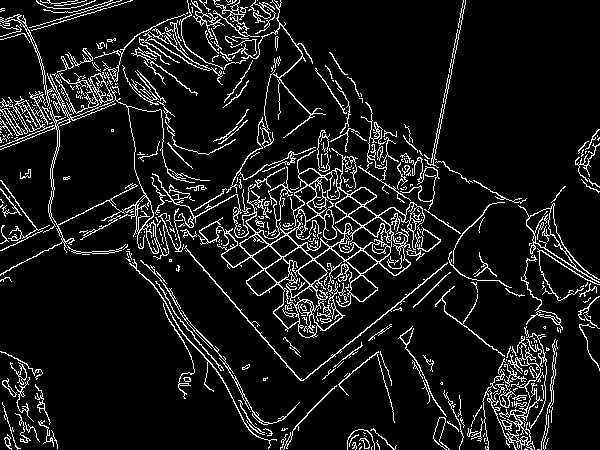

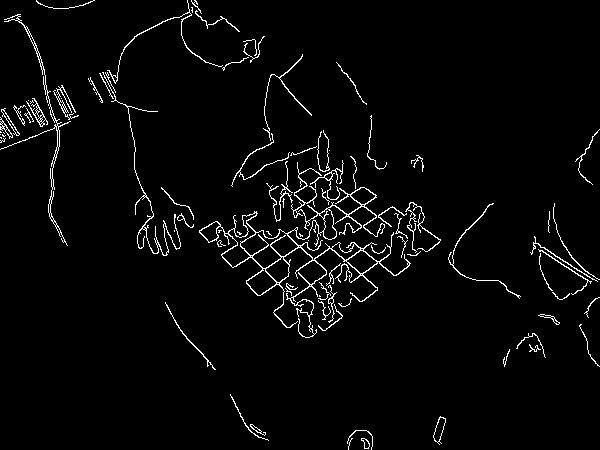

In [3]:
edges_gry = cv2.Canny(np.uint8(gry),50,150,apertureSize = 3)
edges_blurred = cv2.Canny(np.uint8(blurred),50,150,apertureSize = 3)
# edges_closing = cv2.Canny(np.uint8(closing),50,150,apertureSize = 3)
showarray(edges_gry)
showarray(edges_blurred)
# showarray(edges_closing)

# c2 = cv2.morphologyEx(edges_closing, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(,5)))
# showarray(c2)



174


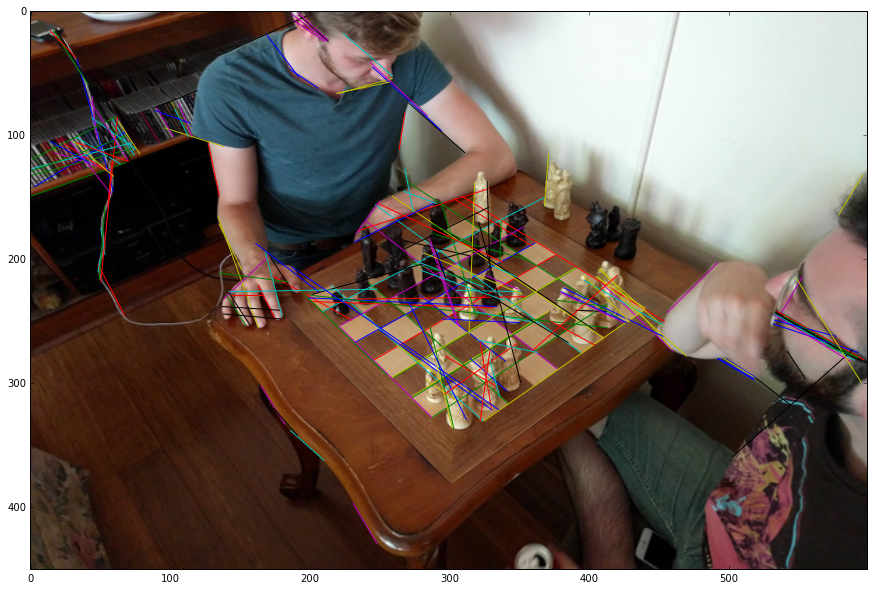

In [8]:
lines = cv2.HoughLinesP(edges_blurred,1,np.pi/180,30, minLineLength = 20, maxLineGap = 20)[:,0,:]
print(len(lines))
fig = plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('tight')
for x1,y1,x2,y2 in lines:
    plt.plot([x1,x2],[y1,y2])

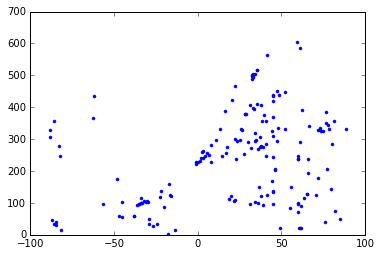

In [9]:
hvals = np.zeros([len(lines),2])
for i,[x1,y1,x2,y2] in enumerate(lines):
    # theta
    m = (y2-y1)/(x2-x1)
    hvals[i,0] = np.arctan2(y2-y1, x2-x1) * 180/np.pi
    # rho
    if x1 == x2:
        hvals[i,1] = x1
    else:
        hvals[i,1] = np.abs(y1+m*x1) / np.sqrt(m*m+1)

plt.plot(hvals[:,0],hvals[:,1],'.');

In [11]:
# (cnts, _) = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]